<a href="https://colab.research.google.com/github/sunny722122/capitalstone_Proj_malaria_detection/blob/main/Reference_Notebook_Milestone_2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Milestone 2

###<b> Mounting the Drive

In [68]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<b>Loading libraries</b>

In [69]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [70]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

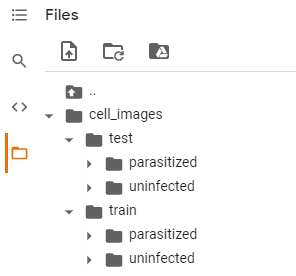

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [71]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [72]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [73]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [74]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [75]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [76]:
# Encoding Train Labels
train_labels = tf.keras.utils.to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [77]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU,BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [13]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [15]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [16]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 97s 154ms/step - loss: 0.3928 - accuracy: 0.8117 - val_loss: 0.1489 - val_accuracy: 0.9828
Epoch 2/20
624/624 [==============================] - 95s 152ms/step - loss: 0.1223 - accuracy: 0.9575 - val_loss: 0.0936 - val_accuracy: 0.9804
Epoch 3/20
624/624 [==============================] - 95s 151ms/step - loss: 0.0898 - accuracy: 0.9710 - val_loss: 0.0737 - val_accuracy: 0.9890
Epoch 4/20
624/624 [==============================] - 94s 151ms/step - loss: 0.0805 - accuracy: 0.9738 - val_loss: 0.0782 - val_accuracy: 0.9842
Epoch 5/20
624/624 [==============================] - 94s 151ms/step - loss: 0.0736 - accuracy: 0.9756 - val_loss: 0.0880 - val_accuracy: 0.9812


###<b> Evaluating the model on test data

In [17]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 38ms/step - loss: 0.1214 - accuracy: 0.9562

 Test_Accuracy:- 0.9561538696289062


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1300
           1       0.98      0.93      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



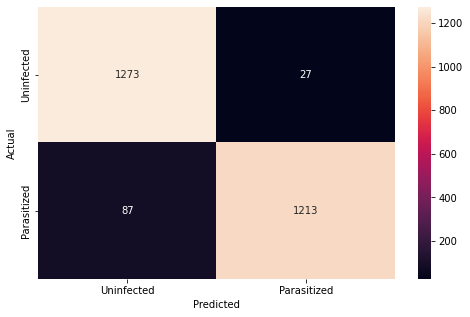

In [18]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [28]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

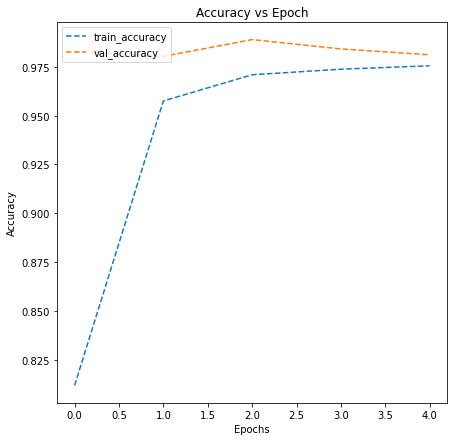

In [20]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [21]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [21]:
# Creating sequential model
model1 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model1.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model1.add(LeakyReLU(0.1))
    
# Adding max pooling to reduce the size of output of the second convolutional layer
model1.add(MaxPooling2D(pool_size = (2, 2)))
    
# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model1.add(Dropout(0.25))
    
# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model1.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model1.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of the fourth convolutional layer    
model1.add(MaxPooling2D(pool_size = (2, 2)))
    
# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model1.add(Dropout(0.25))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 256 neurons    
model1.add(Dense(256))

# Adding LeakyRelu activation function with negative slope of 0.1
model1.add(LeakyReLU(0.1))
    
# Adding dropout to randomly switch off 50% of dense layer neurons to reduce overfitting
model1.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax' activation function since this is a multi-class classification problem
model1.add(Dense(2, activation = 'softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 64, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                      

###<b> Compiling the model

In [22]:
model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005), metrics = ['accuracy'])

<b> Using Callbacks

In [23]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [24]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.1, epochs = 100, verbose = 1)

Epoch 1/100
702/702 [==============================] - 290s 412ms/step - loss: 0.3978 - accuracy: 0.8103 - val_loss: 0.0552 - val_accuracy: 0.9888
Epoch 2/100
702/702 [==============================] - 288s 410ms/step - loss: 0.0931 - accuracy: 0.9701 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 3/100
702/702 [==============================] - 287s 409ms/step - loss: 0.0780 - accuracy: 0.9751 - val_loss: 0.1013 - val_accuracy: 0.9671
Epoch 4/100
702/702 [==============================] - 287s 409ms/step - loss: 0.0699 - accuracy: 0.9768 - val_loss: 0.0400 - val_accuracy: 0.9904
Epoch 5/100
702/702 [==============================] - 287s 409ms/step - loss: 0.0684 - accuracy: 0.9772 - val_loss: 0.0533 - val_accuracy: 0.9880
Epoch 6/100
702/702 [==============================] - 287s 409ms/step - loss: 0.0630 - accuracy: 0.9786 - val_loss: 0.0726 - val_accuracy: 0.9828


###<b> Evaluating the model

In [25]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 9s 103ms/step - loss: 0.0576 - accuracy: 0.9850

 Test_Accuracy:- 0.9850000143051147


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.99      0.98      2600
weighted avg       0.99      0.98      0.98      2600



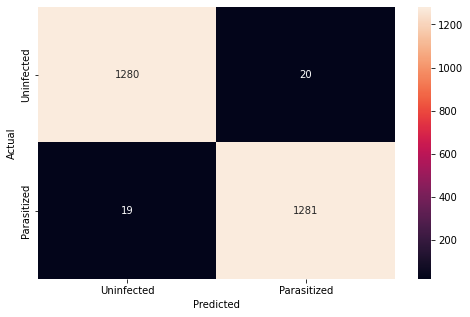

In [27]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

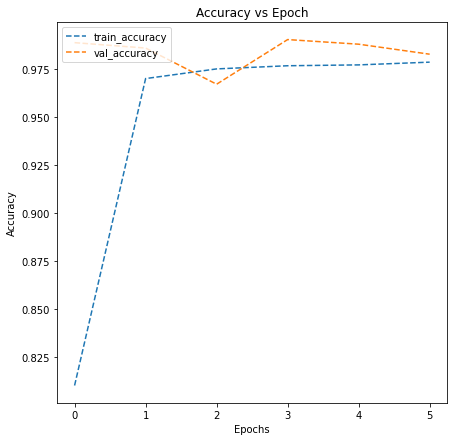

In [29]:
plot_accuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [30]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [81]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model2.add(Dropout(0.2))
    
# Adding max pooling to reduce the size of output of second convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(BatchNormalization( ))
# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons    
model2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model2.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax'  activation function since this is a multi-class classification problem
model2.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)      

###<b>Compiling the model

In [82]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [83]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [84]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 306s 488ms/step - loss: 0.7809 - accuracy: 0.6618 - val_loss: 1.8359 - val_accuracy: 0.1731
Epoch 2/20
624/624 [==============================] - 302s 483ms/step - loss: 0.3447 - accuracy: 0.8598 - val_loss: 0.7754 - val_accuracy: 0.8668
Epoch 3/20
624/624 [==============================] - 301s 482ms/step - loss: 0.2581 - accuracy: 0.9090 - val_loss: 0.0482 - val_accuracy: 0.9986
Epoch 4/20
624/624 [==============================] - 301s 482ms/step - loss: 0.1829 - accuracy: 0.9390 - val_loss: 0.1417 - val_accuracy: 0.9872
Epoch 5/20
624/624 [==============================] - 301s 482ms/step - loss: 0.1457 - accuracy: 0.9531 - val_loss: 0.0144 - val_accuracy: 0.9984
Epoch 6/20
624/624 [==============================] - 301s 482ms/step - loss: 0.1219 - accuracy: 0.9628 - val_loss: 0.0409 - val_accuracy: 0.9954
Epoch 7/20
624/624 [==============================] - 301s 482ms/step - loss: 0.1062 - accuracy: 0.9644 - val_loss: 0.0390 -

<b>Plotting the train and validation accuracy

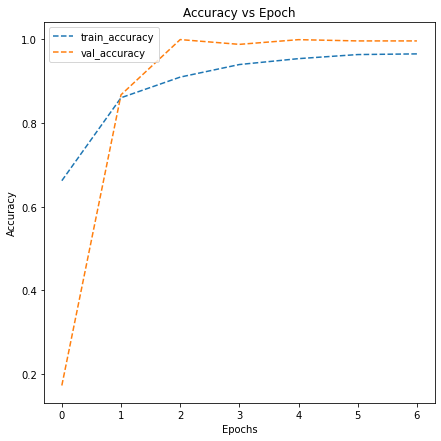

In [85]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [86]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels,  verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 9s 102ms/step - loss: 0.1633 - accuracy: 0.9492

 Test_Accuracy:- 0.9492307901382446


####<b>Observations and insights: 
Since the dropout layer set percentage features to zero for training data, while reserve for validation data, which caused the model for test data be more robust, and lead to higher validation accuracy

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1300
           1       0.99      0.91      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



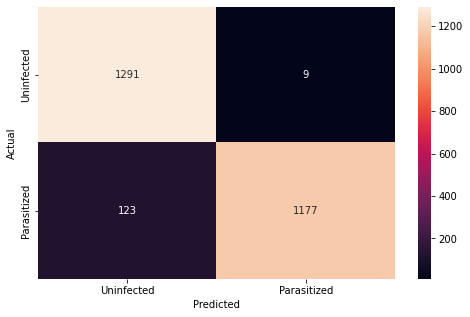

In [87]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [88]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, rescale=True,
                                  zoom_range = 1.0, rotation_range = 10)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

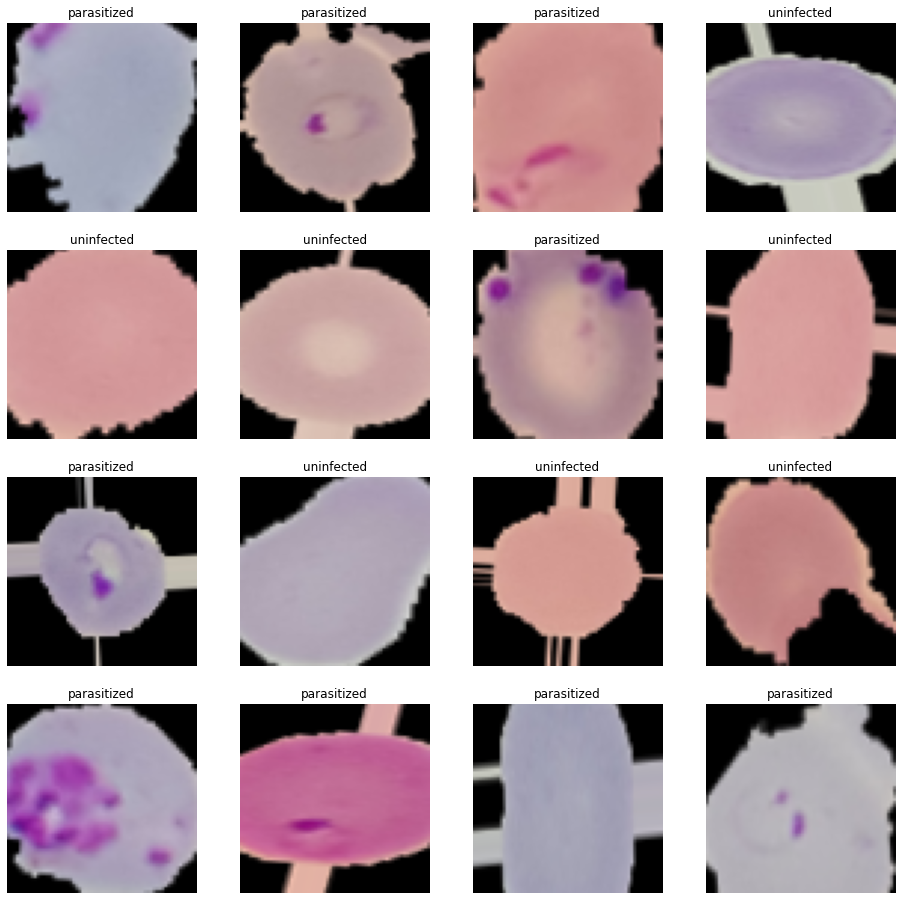

In [90]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: 
After augmentation, 

###<b>Building the Model

In [96]:
model3 = Sequential()

# Build the model here
# Input_shape denotes input image dimension images
model3.add(Conv2D(16, (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

model3.add(Conv2D(8, (3, 3), activation = 'relu', padding = "same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))

model3.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model3.add(Dense(16, activation = 'relu'))
model3.add(Dropout(0.3))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(2, activation = 'softmax'))
# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 8)        32        
 ormalization)                                                   
                                                        

<b>Using Callbacks

In [97]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [98]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 68s 217ms/step - loss: 0.6646 - accuracy: 0.6059 - val_loss: 0.6729 - val_accuracy: 0.5699
Epoch 2/20
312/312 [==============================] - 68s 219ms/step - loss: 0.6046 - accuracy: 0.6832 - val_loss: 1.3350 - val_accuracy: 0.5156
Epoch 3/20
312/312 [==============================] - 67s 214ms/step - loss: 0.4573 - accuracy: 0.7954 - val_loss: 0.8935 - val_accuracy: 0.7280


###<B>Evaluating the model

<b>Plot the train and validation accuracy

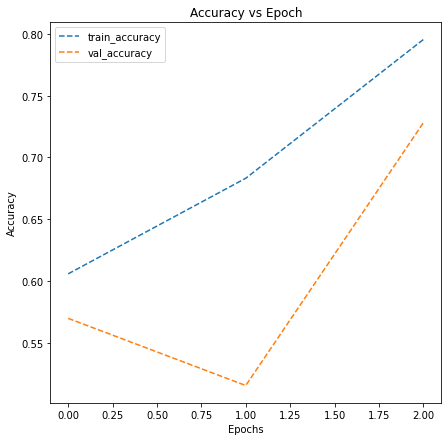

In [99]:
# Potting the accuracies
plot_accuracy(history3)

In [100]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 2s 28ms/step - loss: 0.9333 - accuracy: 0.7038

 Test_Accuracy:- 0.7038461565971375


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1300
           1       0.85      0.50      0.63      1300

    accuracy                           0.70      2600
   macro avg       0.75      0.70      0.69      2600
weighted avg       0.75      0.70      0.69      2600



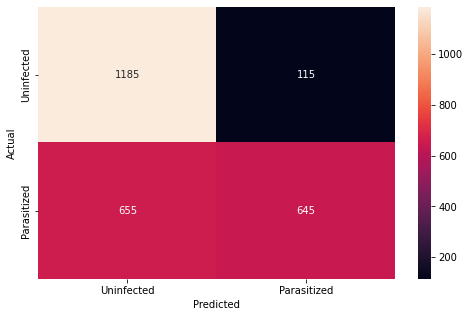

In [101]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [102]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [103]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [105]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [107]:
# Compiling the model 
model4.compile(loss = 'categorical_crossentropy',
                
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

<b> using callbacks

In [109]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [110]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 100,
            callbacks = callbacks,
            batch_size = 20,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/100
999/999 [==============================] - 922s 924ms/step - loss: 0.2681 - accuracy: 0.8879 - val_loss: 0.2349 - val_accuracy: 0.9065
Epoch 2/100
999/999 [==============================] - 917s 918ms/step - loss: 0.1994 - accuracy: 0.9212 - val_loss: 0.2126 - val_accuracy: 0.9199
Epoch 3/100
999/999 [==============================] - 916s 917ms/step - loss: 0.1822 - accuracy: 0.9276 - val_loss: 0.1178 - val_accuracy: 0.9649
Epoch 4/100
999/999 [==============================] - 918s 919ms/step - loss: 0.1754 - accuracy: 0.9316 - val_loss: 0.1034 - val_accuracy: 0.9661
Epoch 5/100
999/999 [==============================] - 918s 919ms/step - loss: 0.1666 - accuracy: 0.9368 - val_loss: 0.2434 - val_accuracy: 0.9062
Epoch 6/100
999/999 [==============================] - 917s 918ms/step - loss: 0.1604 - accuracy: 0.9370 - val_loss: 0.1382 - val_accuracy: 0.9475


<b>Plot the train and validation accuracy

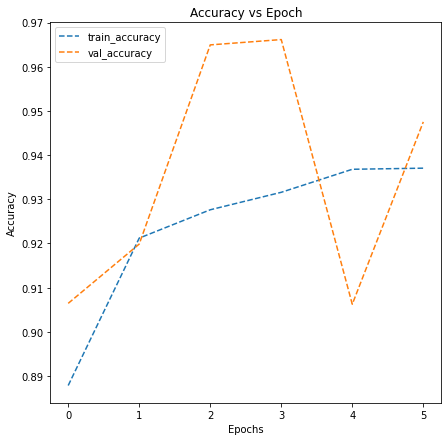

In [111]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: 
The training accuracy is increasing as epoche, while testing accuracy got great fluctuation after epoche 3
<br>
The model not work well on test data, not generalize well**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [112]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 95s 1s/step - loss: 0.1588 - accuracy: 0.9308

 Test_Accuracy:- 0.9307692050933838


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1300
           1       0.90      0.97      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



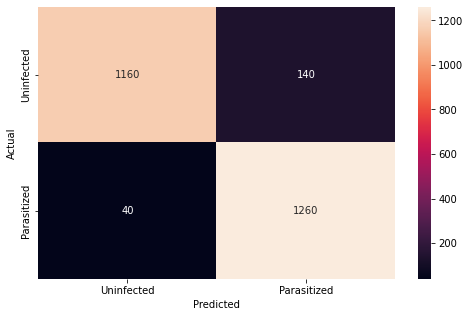

In [113]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: 
- The model is giving about **93% accuracy on the test data** which is **comparable to the accuracy of the validation data.** This implies that the model is giving a generalized performance.
- The **recall is close for parasitized and uninfected images** which implies that the **model is good at identifying both type of images**.
- The **precision higher for uninfected images'** which implies that the model can distinguish uninfected images better than parasitized images. 


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?